In [38]:
# Beyond Bitswap Test Bed
# Be able to create a yaml file custom.
import ipywidgets as widgets
from IPython.display import display
print("Use case configuration")
testcase = widgets.Text(description="Testcase")
input_data = widgets.Text(description="Input Data Type")
file_size = widgets.Text(description="File Size")
files_directory = widgets.Text(description="Files Directory")
run_count = widgets.IntSlider(description="Run Count", min=0, max=300)

display(testcase, input_data, file_size, files_directory, run_count)

print("Network configuration")
n_nodes = widgets.IntSlider(description="Number nodes", min=0, max=300)
n_leechers = widgets.IntSlider(description="Number leechers", min=0, max=300)
n_passive = widgets.IntSlider(description="Number passive nodes", min=0, max=300)
max_peer_connections = widgets.FloatSlider(description="Max peer connections (%)", min=0, max=100)
churn_rate = widgets.IntSlider(description="Churn Rate (%)", min=0, max=100)

display(n_nodes, n_leechers, n_passive, max_peer_connections, churn_rate)


Use case configuration


Text(value='', description='Testcase')

Text(value='', description='Input Data Type')

Text(value='', description='File Size')

Text(value='', description='Files Directory')

IntSlider(value=0, description='Run Count', max=300)

Network configuration


IntSlider(value=0, description='Number nodes', max=300)

IntSlider(value=0, description='Number leechers', max=300)

IntSlider(value=0, description='Number passive nodes', max=300)

FloatSlider(value=0.0, description='Max peer connections (%)')

IntSlider(value=0, description='Churn Rate (%)')

In [4]:
import ui
l = ui.Layout()
l.show()
#display(l.testcase, l.input_data, l.file_size, l.files_directory, l.run_count, \
#    l.n_nodes, l.n_leechers, l.n_passive, l.max_peer_connections, l.churn_rate)


GridspecLayout(children=(Text(value='', description='Testcase', layout=Layout(grid_area='widget001')), Text(va…

In [7]:
# Building config and running testcase
import utils
#testid = utils.runner(utils.process_yaml_config("./config.yaml"))
testid = utils.runner(utils.process_layout_config(l))
print(testid)

Running as:  testground run single --plan=beyond-bitswap --builder=exec:go --runner=local:exec --build-cfg skip_runtime_image=true --testcase=ipfs-transfer --instances=2 -tp input_data=random -tp file_size=12345,54322 -tp leech_count=1 -tp passive_count=0 -tp max_connection_rate=100 -tp run_count=1


In [2]:
# Collecting the data.
utils.collect_data(testid)

Cleaning previous runs..

Aug 20 07:25:12.454001	INFO	using home directory: /home/adlrocha/testground
Aug 20 07:25:12.454049	INFO	no .env.toml found at /home/adlrocha/testground/.env.toml; running with defaults
Aug 20 07:25:12.454057	INFO	testground client initialized	{"addr": "localhost:8042"}

>>> Result:

Aug 20 07:25:12.458686	INFO	created file: f54d0827d35f.tgz

f54d0827d35f/.
f54d0827d35f/single
f54d0827d35f/single/0
f54d0827d35f/single/0/diagnostics.out
f54d0827d35f/single/0/results.out
f54d0827d35f/single/0/run.err
f54d0827d35f/single/0/run.out
f54d0827d35f/single/1
f54d0827d35f/single/1/diagnostics.out
f54d0827d35f/single/1/results.out
f54d0827d35f/single/1/run.err
f54d0827d35f/single/1/run.out



In [32]:
import process
agg, testcases = process.aggregate_results()
byLatency = process.groupBy(agg, "latencyMS")
byNodeType = process.groupBy(agg, "nodeType")
byFileSize = process.groupBy(agg, "fileSize")
byBandwidth = process.groupBy(agg, "bandwidthMB")
byTopology = process.groupBy(agg, "topology")

./results/7bc8b82b25df/single/2/results.out
./results/7bc8b82b25df/single/3/results.out
./results/7bc8b82b25df/single/1/results.out
./results/7bc8b82b25df/single/0/results.out


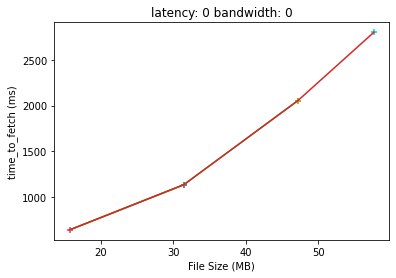

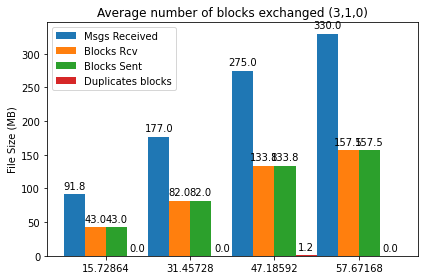

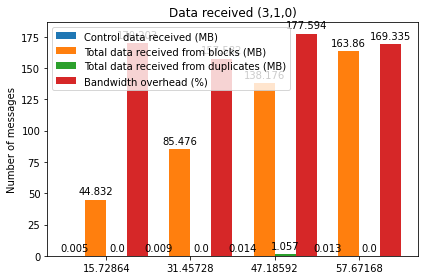

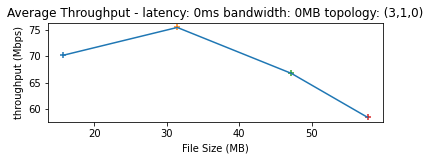

In [33]:
process.plot_latency(byLatency, byBandwidth, byFileSize)
process.plot_messages(byFileSize, byTopology)
process.plot_bw_overhead(byFileSize, byTopology)
process.plot_througput(byLatency, byBandwidth, byFileSize, byTopology, testcases)